In [74]:
#Mount google drive
from google.colab import drive, files
drive.mount('/content/drive')
!ls /content/drive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'My Drive'


In [75]:
import pandas as pd
csvs = !ls /content/drive/My\ Drive/STEM\ Fellowship\ -\ Undergrad\ BDC\ 2020/Datasets/US\ Male\ Unemployment\ CSV\ \(for\ #7\)/

split = []
for item in csvs:
  split.extend(item.split())

split

df = []

root = '/content/drive/My Drive/STEM Fellowship - Undergrad BDC 2020/Datasets/US Male Unemployment CSV (for #7)/'
for i in range(len(split)):
  df.append(pd.read_csv(root + f'{split[i]}'))
  df[i].name = f'{split[i]}'

df[0].name

'16-19.csv'

In [0]:
string = ['/content/drive/My Drive/STEM Fellowship - Undergrad BDC 2020/Datasets/US Male Unemployment CSV (for #7)/']
new = []
newer =  ""
for item in string:
  new.extend(item.split(" "))

for item in new:
  string = f'{item}'
  newer = newer  + ' ' + string

newer

' /content/drive/My Drive/STEM Fellowship - Undergrad BDC 2020/Datasets/US Male Unemployment CSV (for #7)/'

In [0]:
from google.colab import drive
drive.mount('/content/drive')
/content/drive/My Drive/STEM Fellowship - Undergrad BDC 2020/Datasets/Economic Data (for #8)/Indicators

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [0]:
root = '/content/drive/My Drive/STEM Fellowship - Undergrad BDC 2020/Datasets/Unemployment by Sex Race (for #4)/'
pd.read_csv(root + 'Asian Female.csv')

Labor Force Statistics from the Current Population Survey  ... Unnamed: 13
0                                 Original Data Value         ...         NaN
1                                                 NaN         ...         NaN
2                                          Series Id:         ...         NaN
3                             Not Seasonally Adjusted         ...         NaN
4                                       Series title:         ...         NaN
5                                 Labor force status:         ...         NaN
6                                       Type of data:         ...         NaN
7                                                Age:         ...         NaN
8                                               Race:         ...         NaN
9                                                Sex:         ...         NaN
10                                             Years:         ...         NaN
11                                                NaN         ...         NaN
12                                               Year         ...      Annual
13                                               2000         ...         3.6
14                                               2001         ...         4.4
15                                               2002         ...         5.7
16                                               2003         ...         5.7
17                                               2004         ...         4.3
18                                               2005         ...         3.9
19                                               2006         ...         3.1
20                                               2007         ...         3.4
21                                               2008         ...         3.7
22                                               2009         ...         6.6
23                                               2010         ...         7.1
24                                               2011         ...         7.3
25                                               2012         ...         6.1
26                                               2013         ...         4.8
27                                               2014         ...         4.6
28                                               2015         ...         3.7
29                                               2016         ...         3.9
30                                               2017         ...         3.4
31                                               2018         ...         3.0
32                                               2019         ...         2.7
33                                               2020         ...         NaN

[34 rows x 14 columns]

In [0]:
#Import unemploymnet Dataset
root = '/content/drive/My Drive/STEM Fellowship - Undergrad BDC 2020/CSV Files/'
Asian_F_raw = pd.read_csv(root + 'Unemployment by Sex Race (for #4)/Asian Female.csv')


In [0]:
#Lets check out the date column, and change to datetime64 if needed
print(covid.date.dtype)


object


In [0]:
#Convert date to datetime and set it as the index
covid.date = pd.to_datetime(covid.date, dayfirst=True)
covid = covid.set_index('date')
covid.head()

pruid            prname  ... percentoday  ratetotal
date                                 ...                       
2020-01-31     35           Ontario  ...       300.0      0.021
2020-01-31     59  British Columbia  ...       100.0      0.020
2020-01-31      1            Canada  ...       400.0      0.011
2020-02-08     35           Ontario  ...         0.0      0.021
2020-02-08     59  British Columbia  ...       300.0      0.079

[5 rows x 14 columns]

In [0]:
#I'll drop the french province name, the province id and just keep the number of deaths and total number
covid = covid.loc[:,['prname','numdeaths','numtotal']]
covid.head()

prname  numdeaths  numtotal
date                                             
2020-01-31           Ontario        0.0         3
2020-01-31  British Columbia        0.0         1
2020-01-31            Canada        0.0         4
2020-02-08           Ontario        0.0         3
2020-02-08  British Columbia        0.0         4

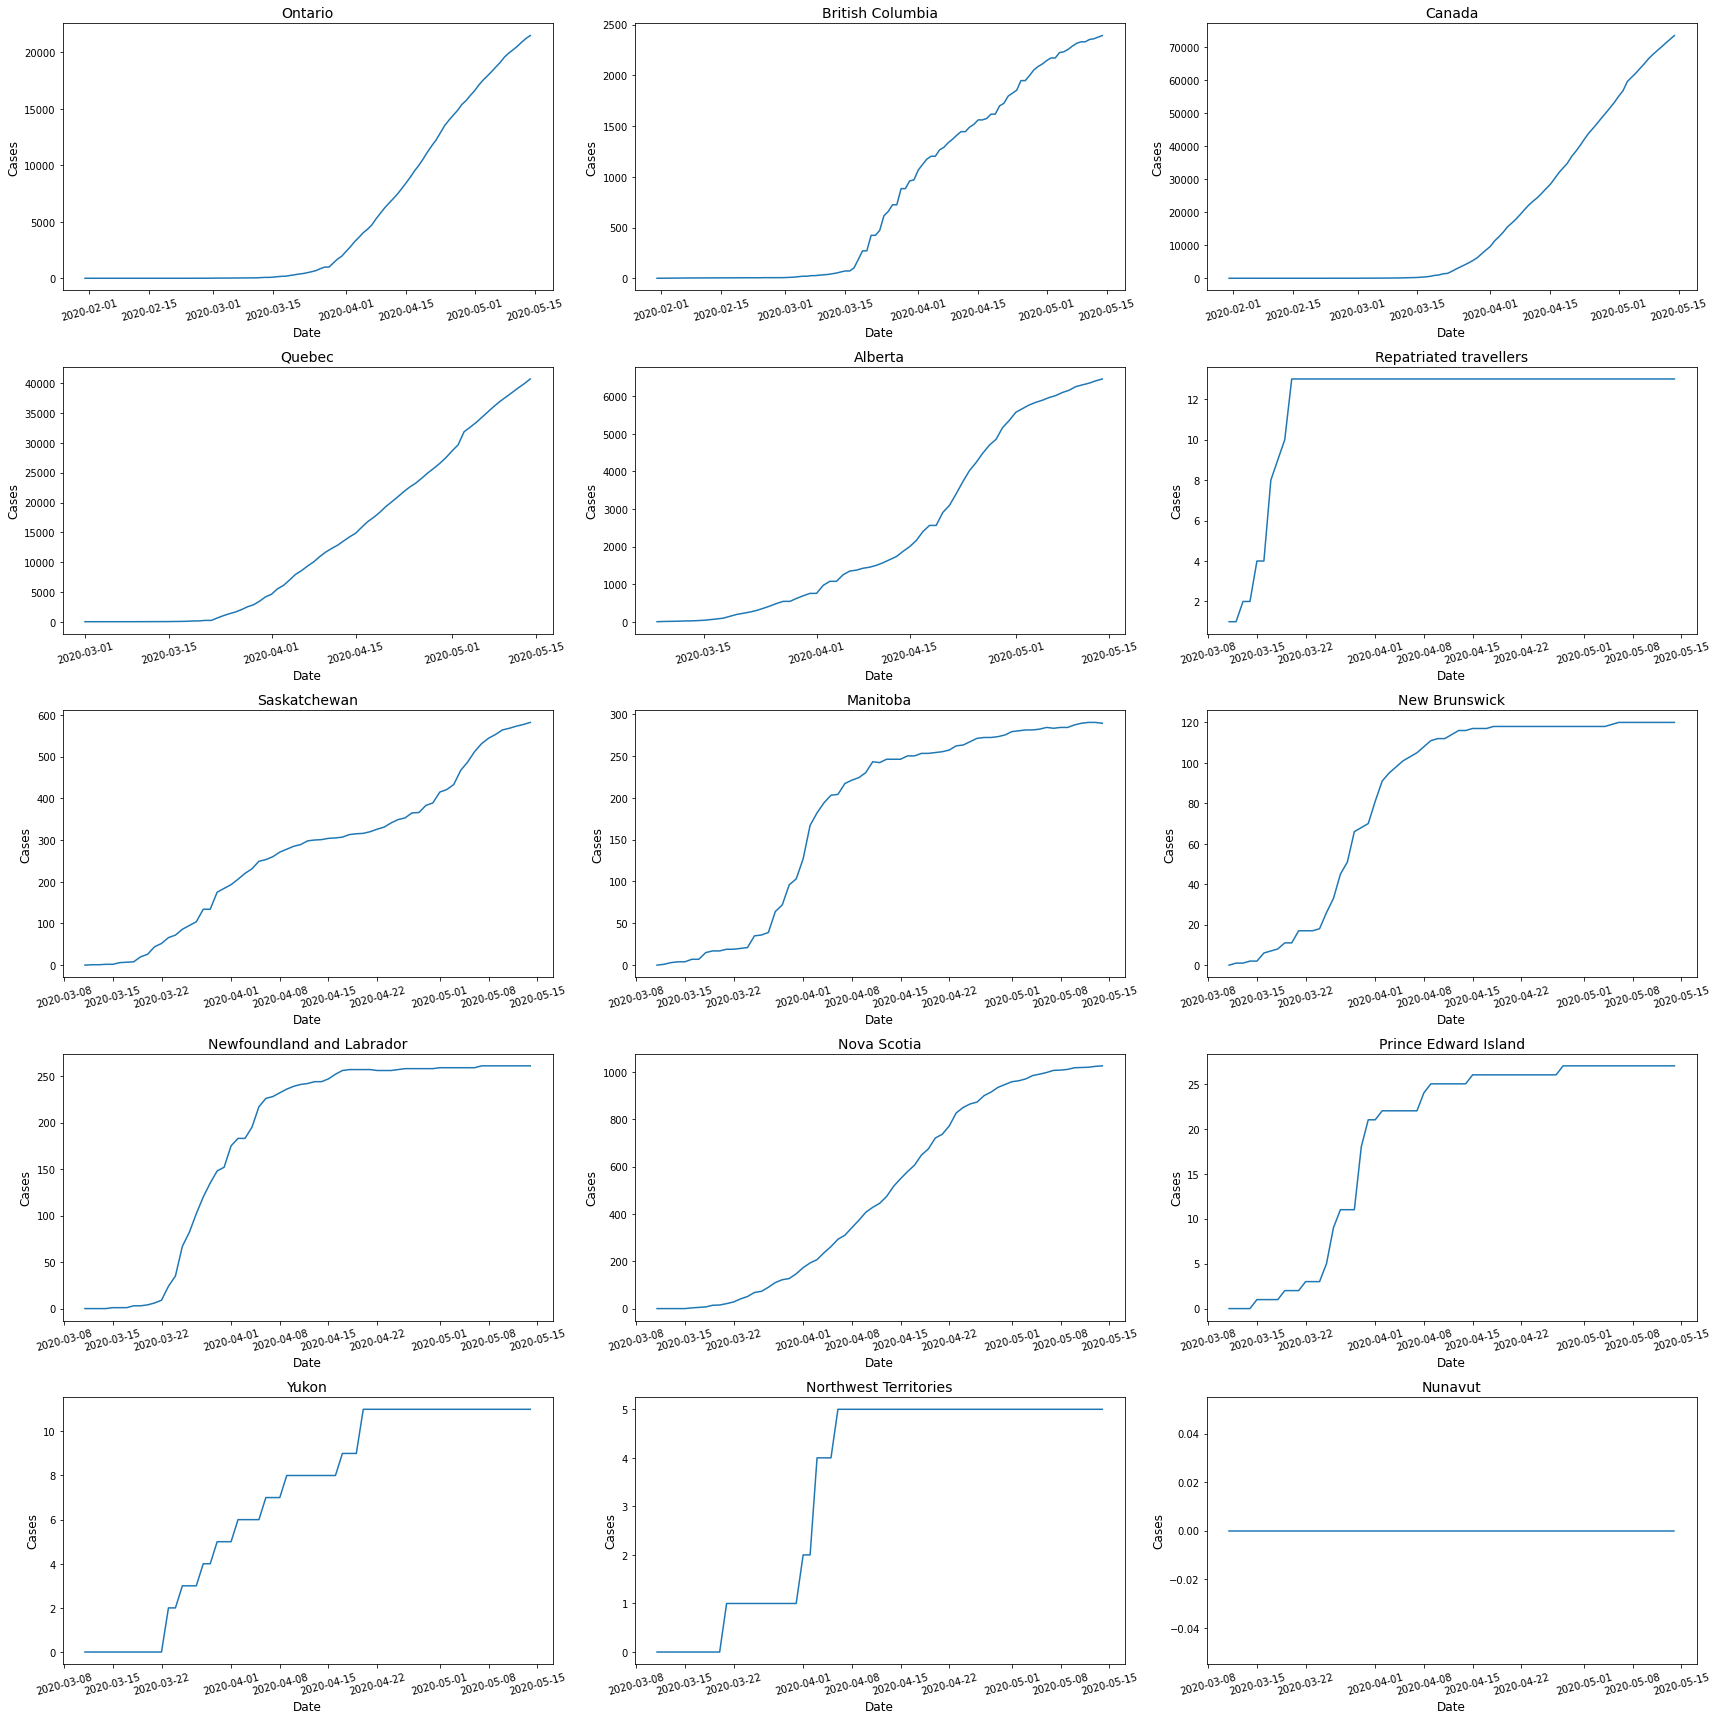

In [0]:
#Programmatically plot each province's case vs time plot
num_pr = len(covid.prname.unique())

#Get widht and height dimensions for plotting
gs_w = int(num_pr**(0.5))
gs_h = int(num_pr/gs_w)

#There's probaby a much better way of doing this
while gs_h*gs_w < num_pr:
  gs_h += 1
assert gs_w*gs_h >= num_pr, 'Expected %i, but got %ix%i' %(num_pr, gs_w, gs_h)


fig, ax = plt.subplots(gs_h,gs_w)
fig.set_size_inches(24,24)
fig.set_facecolor('w')
#fig.tight_layout()

#plt.subplots_adjust(hspace=0.3,wspace=0.2)

r = 0
c = 0

for i,pr in enumerate(covid.prname.unique()):
  ax[r,c].plot(covid[covid.prname==pr].numtotal)
  ax[r,c].set_title('%s' %(pr), fontsize=14)

  #Canvas needs to be drawn first for some reason
  fig.canvas.draw()
  xlabels = ax[r,c].get_xticklabels()
  ax[r,c].set_xticklabels(xlabels, rotation=15)

  ax[r,c].set_xlabel('Date', fontsize=12)
  ax[r,c].set_ylabel('Cases', fontsize=12)

  c+=1
  if c == gs_w:
    r+=1
    c=0
fig.tight_layout()
plt.show()



So we see that besides the provinces and territories we also have Canada as a whole and repatriated travellers. Also, Nunavut has seen no cases, so it'll be interesting to see if there is as large an increase as the others, or maybe just the fact that social distancing was implemented.

### Looking at Suicide Rates in Canada

In [0]:
#Import the dataset, note that it is in .xlsx format
suicide = pd.read_excel('/content/drive/My Drive/Colab Notebooks/suicide_stats_canada.xlsx')
suicide.sample(100)

ValueError: ignored